In [1]:
# Import Standard Libraries
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

# Data Visualization
import seaborn as sns

# Splits Data
from sklearn.model_selection import train_test_split as tts

# Imports model
from sklearn.linear_model import LinearRegression as LR

# IMPORT JOBLIB TO EXPORT MODEL
import joblib


In [2]:
'''
We need to predict the students grade based on a multitude of factors.
Some include what school these students go to and if the school is public or not
'''

'\nWe need to predict the students grade based on a multitude of factors.\nSome include what school these students go to and if the school is public or not\n'

In [3]:
# Read DATASET
data = pd.DataFrame(pd.read_csv('test_scores.csv'))

In [4]:
# Inspect Data
print(data)


     school school_setting school_type classroom teaching_method  n_student  \
0     ANKYI          Urban  Non-public       6OL        Standard       20.0   
1     ANKYI          Urban  Non-public       6OL        Standard       20.0   
2     ANKYI          Urban  Non-public       6OL        Standard       20.0   
3     ANKYI          Urban  Non-public       6OL        Standard       20.0   
4     ANKYI          Urban  Non-public       6OL        Standard       20.0   
...     ...            ...         ...       ...             ...        ...   
2128  ZOWMK          Urban      Public       ZBH        Standard       30.0   
2129  ZOWMK          Urban      Public       ZBH        Standard       30.0   
2130  ZOWMK          Urban      Public       ZBH        Standard       30.0   
2131  ZOWMK          Urban      Public       ZBH        Standard       30.0   
2132  ZOWMK          Urban      Public       ZBH        Standard       30.0   

     student_id  gender                            

In [5]:
'''
We need to inspect the data
'''

# look at the unique value of a few columns
print(data['school'].unique())

print(data['school_setting'].unique())

print(data['school_type'].unique())

print(data['classroom'].unique())

print(data['teaching_method'].unique())

'''
WHAT CAN WE INFER

Features that Affect student grade:
    1)School
    2)School setting
    3)School_type
    4)teaching Method
    5)number of students in each class room
    6)Gender
    7)Lunch
    8)Pretest

Lables :
    1)Posttest
    
Fields that do not matter:
    1)Classroom
    2)Student_id

'''


['ANKYI' 'CCAAW' 'CIMBB' 'CUQAM' 'DNQDD' 'FBUMG' 'GJJHK' 'GOKXL' 'GOOBU'
 'IDGFP' 'KFZMY' 'KZKKE' 'LAYPA' 'OJOBU' 'QOQTS' 'UAGPU' 'UKPGS' 'UUUQX'
 'VHDHF' 'VKWQH' 'VVTVA' 'ZMNYA' 'ZOWMK']
['Urban' 'Suburban' 'Rural']
['Non-public' 'Public']
['6OL' 'ZNS' '2B1' 'EPS' 'IQN' 'PGK' 'UHU' 'UWK' 'A33' 'EID' 'HUJ' 'PC6'
 '1Q1' 'BFY' 'OMI' 'X6Z' '2AP' 'PW5' 'ROP' 'ST7' 'XXJ' '197' '5LQ' 'JGD'
 'HCB' 'NOR' 'X78' 'YUC' 'ZDT' 'ENO' 'TSA' 'VA6' '18K' 'CXC' 'HKF' 'PBA'
 'U6J' 'W8A' '05H' '98D' 'G2L' 'P2A' 'XZM' '1VD' '21Q' '2BR' '3D0' '5JK'
 'O6A' 'QTU' 'AJ1' 'J8J' 'RA5' '5SZ' '6U9' 'FS3' 'XJ8' '0N7' '3XJ' 'RK7'
 'SUR' 'X2O' 'XZ4' '1SZ' '62L' 'NWZ' 'S98' '08N' '9AW' 'IPU' 'KXB' 'PGH'
 'XXE' '6C1' 'AE1' 'H7S' 'P8I' 'SSP' 'CD8' 'J6X' 'KR1' '341' 'D33' 'DFQ'
 'GYM' 'IEM' '7BL' 'A93' 'TB5' 'YTB' '1UU' '4NN' 'V77' 'CII' 'Q0E' 'QA2'
 'ZBH']
['Standard' 'Experimental']


'\nWHAT CAN WE INFER\n\nFeatures that Affect student grade:\n    1)School\n    2)School setting\n    3)School_type\n    4)teaching Method\n    5)number of students in each class room\n    6)Gender\n    7)Lunch\n    8)Pretest\n\nLables :\n    1)Posttest\n    \nFields that do not matter:\n    1)Classroom\n    2)Student_id\n\n'

In [6]:
# We drop the columns that have no correleation
data = data.drop(['student_id','classroom'],axis=1)

<BarContainer object of 2133 artists>

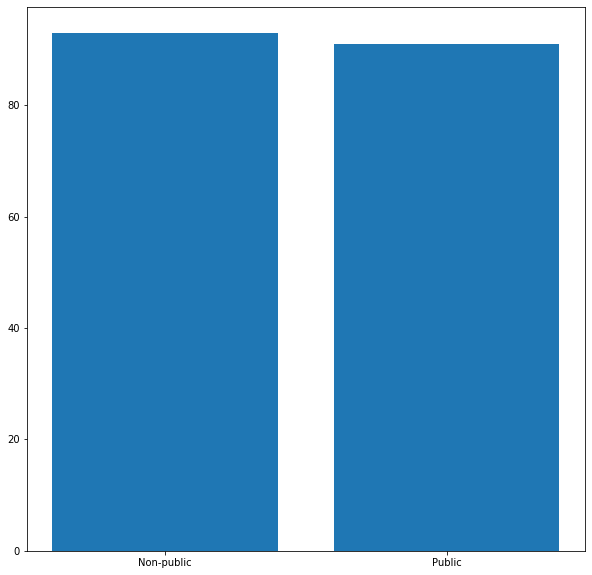

In [7]:
fig, ax = plt.subplots(figsize=(10,10))  
plt.bar(data['school_type'],data['pretest'])

<AxesSubplot:>

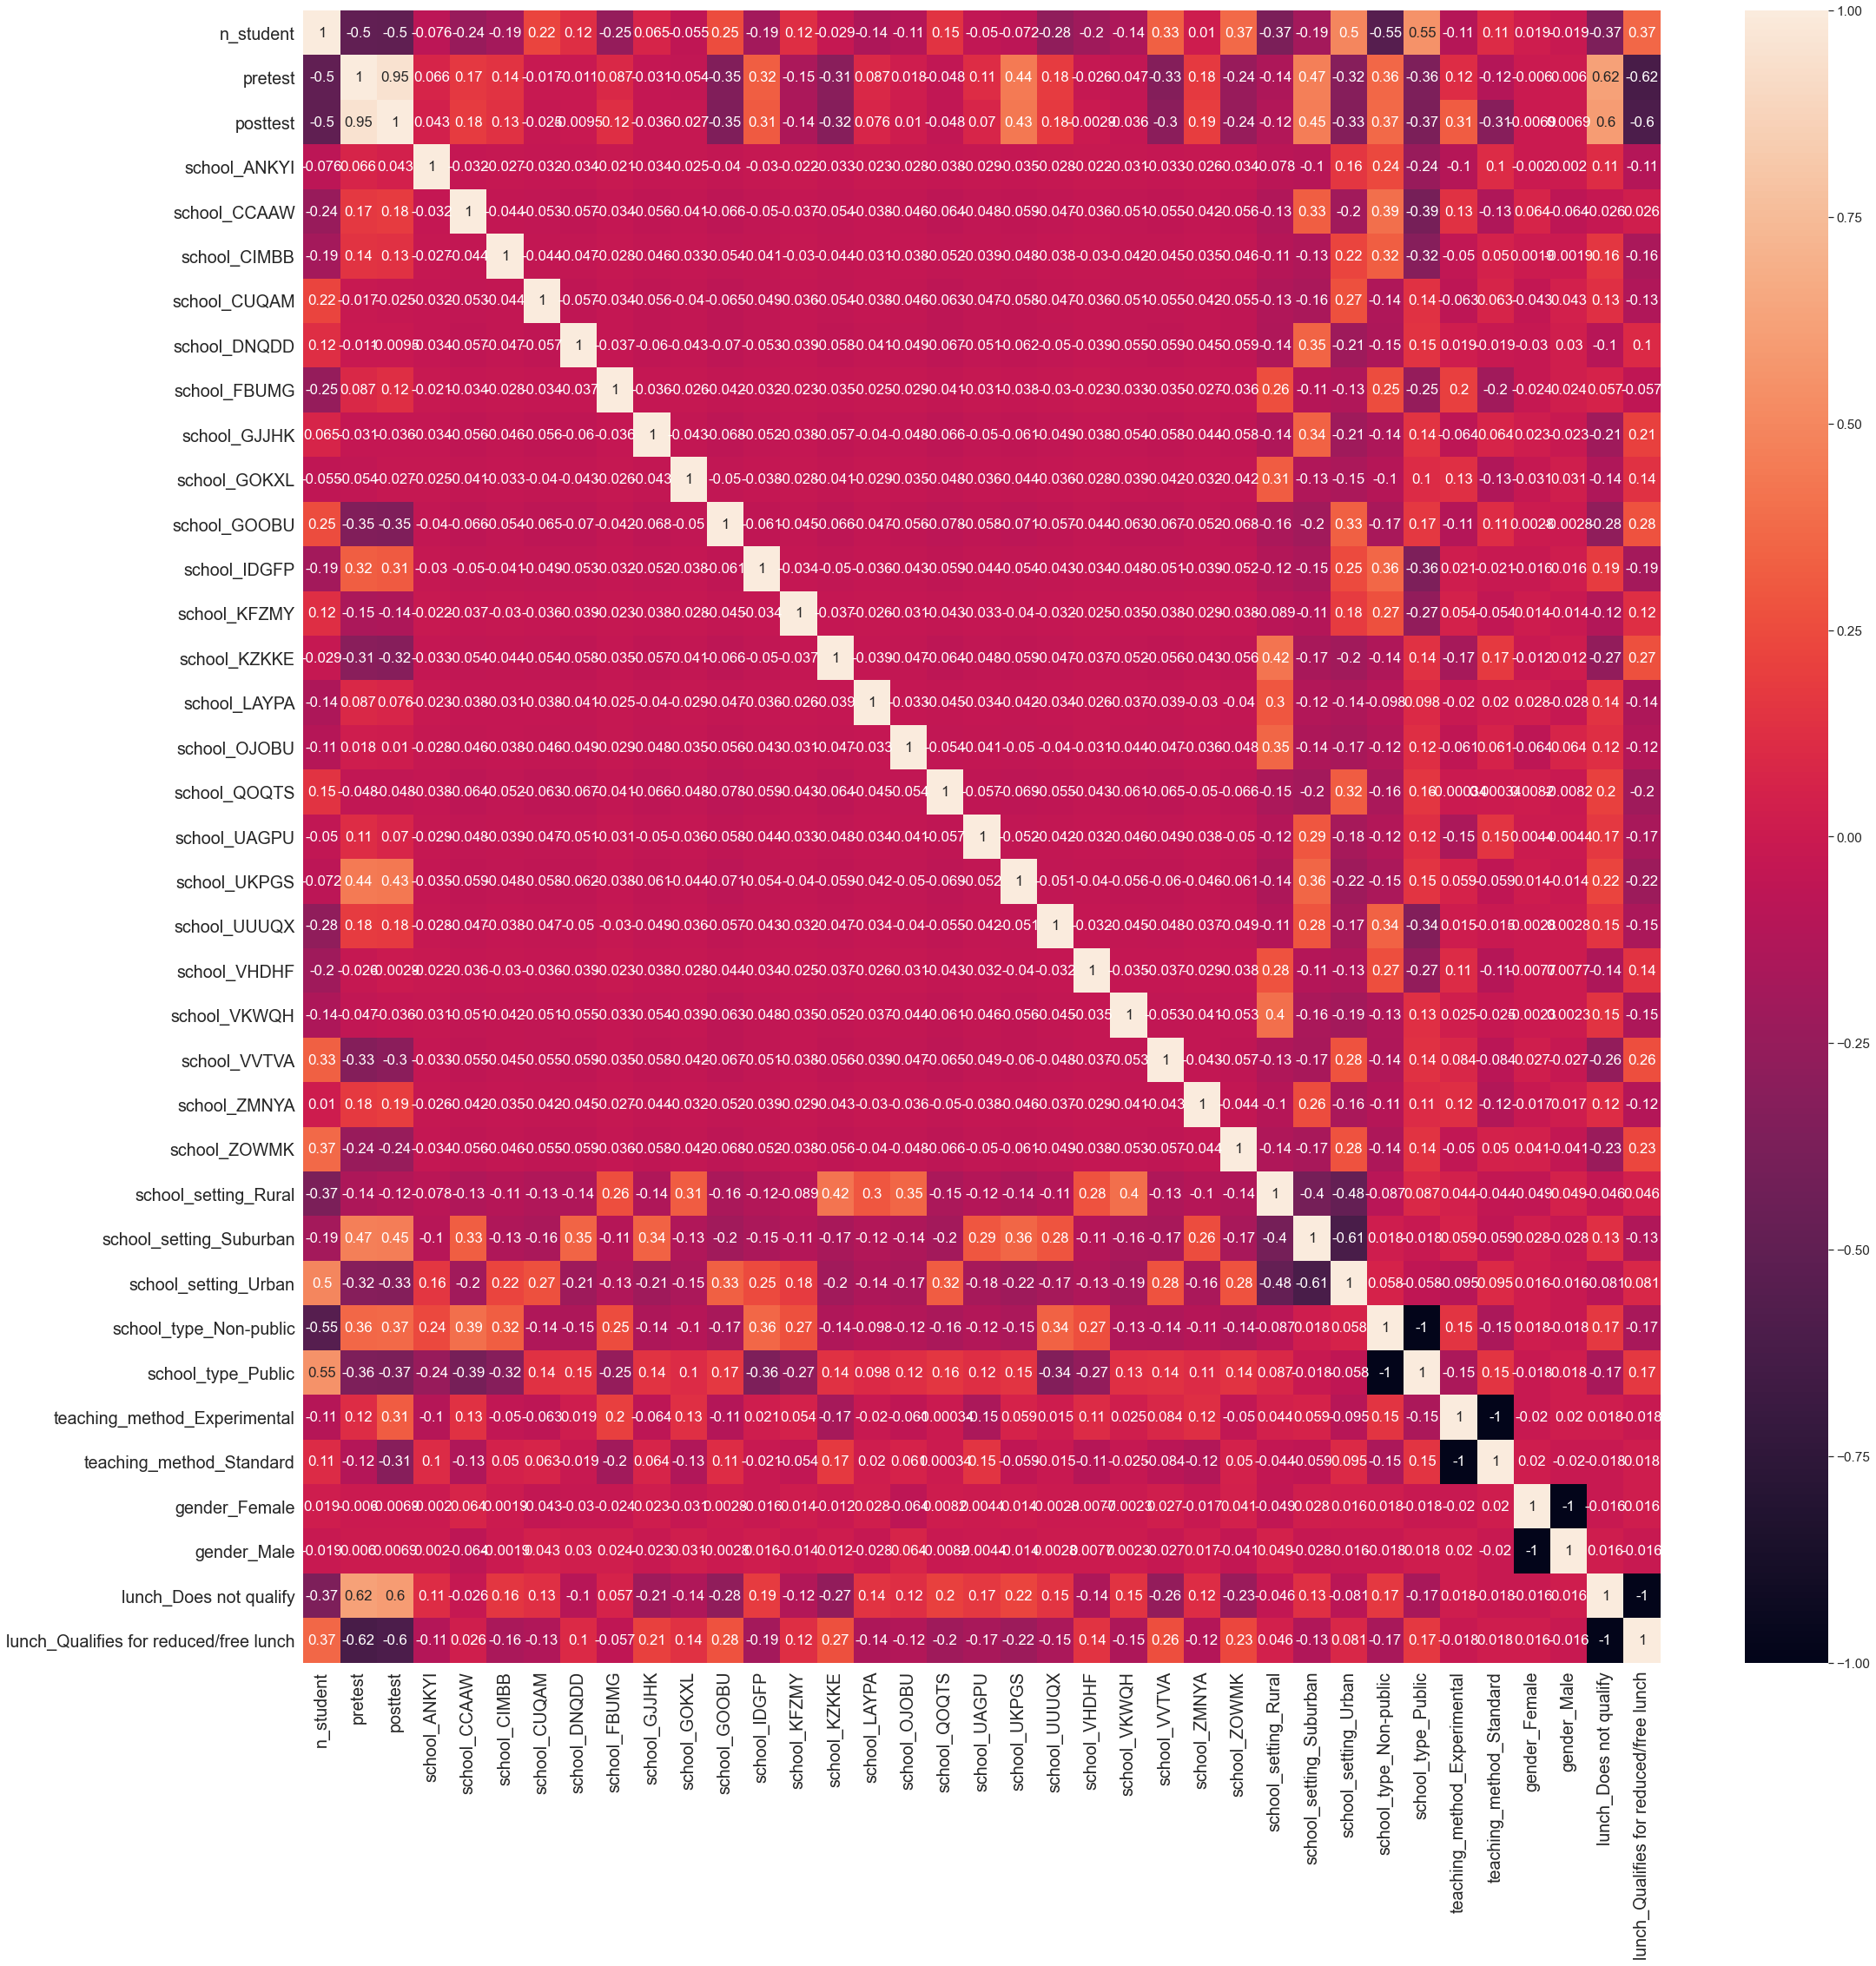

In [17]:
# Convert all Text Values to a numerical Format
data = pd.get_dummies(data)
fig, ax = plt.subplots(figsize=(35,35))  
sns.set(font_scale=1.4)

sns.heatmap(data.corr(),annot=True)

In [9]:
# Verify Columns were dropped
data

,n_student,pretest,posttest,school_ANKYI,school_CCAAW,school_CIMBB,school_CUQAM,school_DNQDD,school_FBUMG,school_GJJHK,...,school_setting_Suburban,school_setting_Urban,school_type_Non-public,school_type_Public,teaching_method_Experimental,teaching_method_Standard,gender_Female,gender_Male,lunch_Does not qualify,lunch_Qualifies for reduced/free lunch
0,20.0,62.0,72.0,1,0,0,0,0,0,0,...,0,1,1,0,0,1,1,0,1,0
1,20.0,66.0,79.0,1,0,0,0,0,0,0,...,0,1,1,0,0,1,1,0,1,0
2,20.0,64.0,76.0,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,0
3,20.0,61.0,77.0,1,0,0,0,0,0,0,...,0,1,1,0,0,1,1,0,1,0
4,20.0,64.0,76.0,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,30.0,39.0,55.0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,0,1,0
2129,30.0,38.0,46.0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,0,0,1
2130,30.0,45.0,51.0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,0,0,1
2131,30.0,46.0,53.0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1


In [10]:
# Split our Data into Features and Label

# Features
X = data.drop('posttest',axis=1)
# Lables
Y = data['posttest']

x_train,x_test,y_train,y_test = tts(X,Y)

In [11]:
# Creates model and trains
model = LR()
model.fit(x_train,y_train)

LinearRegression()

In [12]:
'''
    Model Is Trained and now we need to evaluate its socre
'''

# Based on data it has seen
print(f'{model.score(x_train,y_train):.4f}')

# Based on data it hasnt seen
print(f'{model.score(x_test,y_test):.4f}')

'''
MODEL HAS A SCORE OF 94% which is amazing
'''

0.9492
0.9520


'\nMODEL HAS A SCORE OF 94% which is amazing\n'

In [13]:
# Prediction will now be made and stored in a variable
predictions = model.predict(x_test)
actual = y_test # Actual Results

predict = pd.DataFrame({'Predictions' : (predictions), 'Actual' : actual})

In [16]:
# Inspects Predict dataframe
predict.sample(25).reset_index()

,index,Predictions,Actual
0,1121,74.167786,72.0
1,49,75.405090,74.0
2,1081,43.250427,38.0
3,2072,52.876831,49.0
4,1377,71.295715,73.0
5,507,59.357666,61.0
6,689,58.544006,56.0
7,1618,86.800232,88.0
8,569,62.670410,57.0
9,2116,48.477234,48.0


In [15]:
# Dump Model
joblib.dump(model,'model.pkl')

['model.pkl']